<a href="https://colab.research.google.com/github/venidaydream/Data-Science/blob/main/Copy_of_Taller2_Elbow_PCA_Venelina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [133]:
df = pd.read_csv("/content/Country Risk 2019 Data.csv")
df

,Country,Abbrev,Corr,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400
117,Vietnam,VI,37,1.877,5.084,6.500
118,Yemen,YE,15,3.369,2.671,2.113
119,Zambia,ZM,34,1.805,4.592,2.021


In [134]:
df.describe()

,Corr,Peace,Legal,GDP Growth
count,121.000000,121.000000,121.000000,121.000000
mean,46.842975,2.001017,5.752529,2.657529
std,18.702499,0.461485,1.373932,2.563741
min,15.000000,1.072000,2.671000,-9.459000
25%,33.000000,1.699000,4.785000,1.249000
50%,41.000000,1.939000,5.455000,2.600000
75%,60.000000,2.294000,6.488000,4.000000
max,87.000000,3.369000,8.712000,7.800000


# 1. Hacer la curva del codo y decidir el numero de clusters

In [135]:
#separating features from names, as we are interested only in features
features = ['Corr',	'Peace',	'Legal','GDP Growth']
names = ['Country',	'Abbrev']

#getting the values in array type of object
x_features=df.loc[:,features].values
y_names=df.loc[:,names].values

In [136]:
scaler = StandardScaler() #scaling
x_features_std =scaler.fit_transform(x_features) #standardizing -> this is the model to be used in the model

# Elbow method

Method to define the numbers of clusters

Typically expressed as a line plot between the number of clusters and their corresponding distortions.

There are two ways of getting the 'elbow' - using the built-in function in the Yellowbrick library or manually. I try both methods to ensure accuracy.

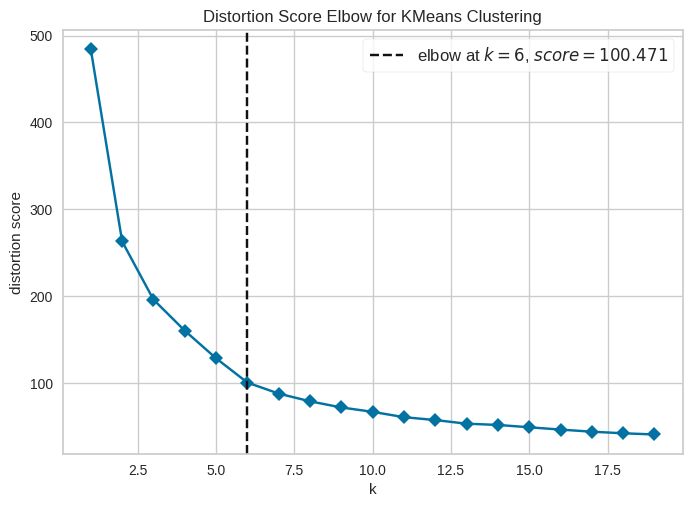

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [137]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=4)
visualizer = KElbowVisualizer(model, k=(1,20), timings=False)
visualizer.fit(x_features_std)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/poof the datax

another way of getting the 'elbow', a bit more manual, in order to break down the process

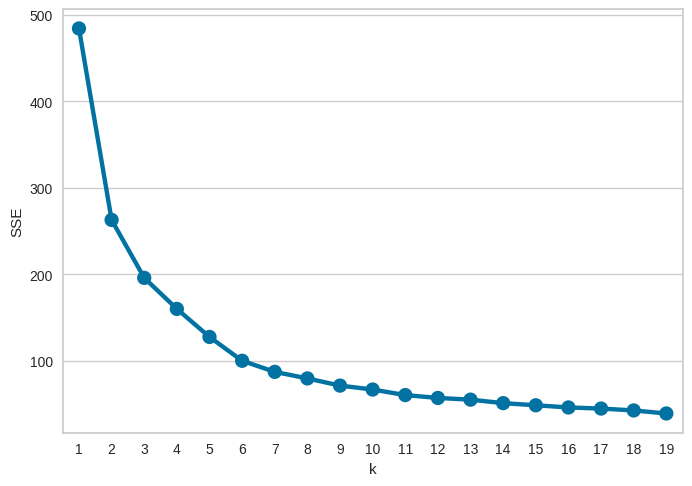

In [138]:
sse = {}

for k in range(1,20):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(x_features_std)
  sse[k] = kmeans.inertia_

plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

codigo del taller

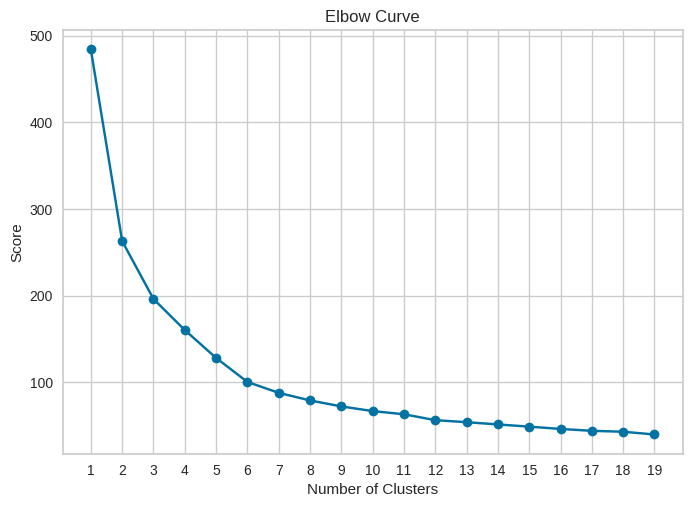

In [139]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [(-1)*(kmeans[i].fit(x_features_std).score(x_features_std)) for i in range(len(kmeans))]
plt.plot(Nc,score,marker='o')
plt.xticks(np.arange(min(Nc), max(Nc)+1, 1.0))
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Conclusion from the elbow method:

6 clusters


# 2. Hacer la clasification con los clusters sugeridos.

In [140]:
kmeans = KMeans(init="k-means++",n_clusters=6, n_init=12, random_state=42)
kmeans.fit(x_features_std)
cluster_labels = kmeans.labels_

# 3. Definir cada grupo: darle nombre de acuerdo al promedio en las variables

In [141]:
df_clustered=df.assign(Cluster = cluster_labels)
df_clustered.groupby(df_clustered['Cluster']).mean().round(2)

,Corr,Peace,Legal,GDP Growth
Cluster,,,,
0,37.62,2.09,5.04,5.98
1,58.45,1.74,6.60,2.55
2,36.64,2.07,5.05,2.17
3,29.25,2.33,4.43,-6.16
4,26.79,2.85,4.31,2.29
5,80.53,1.42,8.18,1.48


In [142]:
df_clustered.groupby(df_clustered['Cluster']).mean().round(2).sort_values('Corr', ascending = False)

,Corr,Peace,Legal,GDP Growth
Cluster,,,,
5,80.53,1.42,8.18,1.48
1,58.45,1.74,6.60,2.55
0,37.62,2.09,5.04,5.98
2,36.64,2.07,5.05,2.17
3,29.25,2.33,4.43,-6.16
4,26.79,2.85,4.31,2.29


Cluster 0 - Medium corruption, High GDP growth - Emerging countries

Cluster 1 - Low corruption, Good GDP growth - Growing countries

Cluster 2 - Medium corruption, Low GDP growth - Slow emerging countries

Cluster 3 - High corruption, Negative GDP growth - Poor countries

Cluster 4 - High corruption, Good GDP growth - Conflict countries

Cluster 5 - Very low corruption, Medium GDP growth - Stable countries

In [143]:
conditions = [
    (df_clustered["Cluster"] == 0),
    (df_clustered["Cluster"] == 1),
    (df_clustered["Cluster"] == 2),
    (df_clustered["Cluster"] == 3),
    (df_clustered["Cluster"] == 4),
    (df_clustered["Cluster"] == 5)
]

values = ['Emerging', 'Growing', 'Slow emerging','Poor', 'Conflict', 'Stable']
df_clustered["Cluster_Name"] = np.select(conditions, values)
df_clustered

,Country,Abbrev,Corr,Peace,Legal,GDP Growth,Cluster,Cluster_Name
0,Albania,AL,35,1.821,4.546,2.983,2,Slow emerging
1,Algeria,DZ,35,2.219,4.435,2.553,2,Slow emerging
2,Argentina,AR,45,1.989,5.087,-3.061,3,Poor
3,Armenia,AM,42,2.294,4.812,6.000,0,Emerging
4,Australia,AU,77,1.419,8.363,1.713,5,Stable
...,...,...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400,1,Growing
117,Vietnam,VI,37,1.877,5.084,6.500,0,Emerging
118,Yemen,YE,15,3.369,2.671,2.113,4,Conflict
119,Zambia,ZM,34,1.805,4.592,2.021,2,Slow emerging


# 4. Hay un grupo mayoritario? cual?

In [144]:
majority_group = df_clustered["Cluster_Name"].mode().values[0]
print(f"Majority group is: {majority_group}")

Majority group is: Slow emerging


In [145]:
cluster_sizes = [sum(cluster_labels == i) for i in range(6)]
cluster_sizes

[24, 29, 33, 4, 14, 17]

# 5. Hacer el grafico de los clusters sobre las dos primeras componentes.


Plot with Corruption and GDP Growth

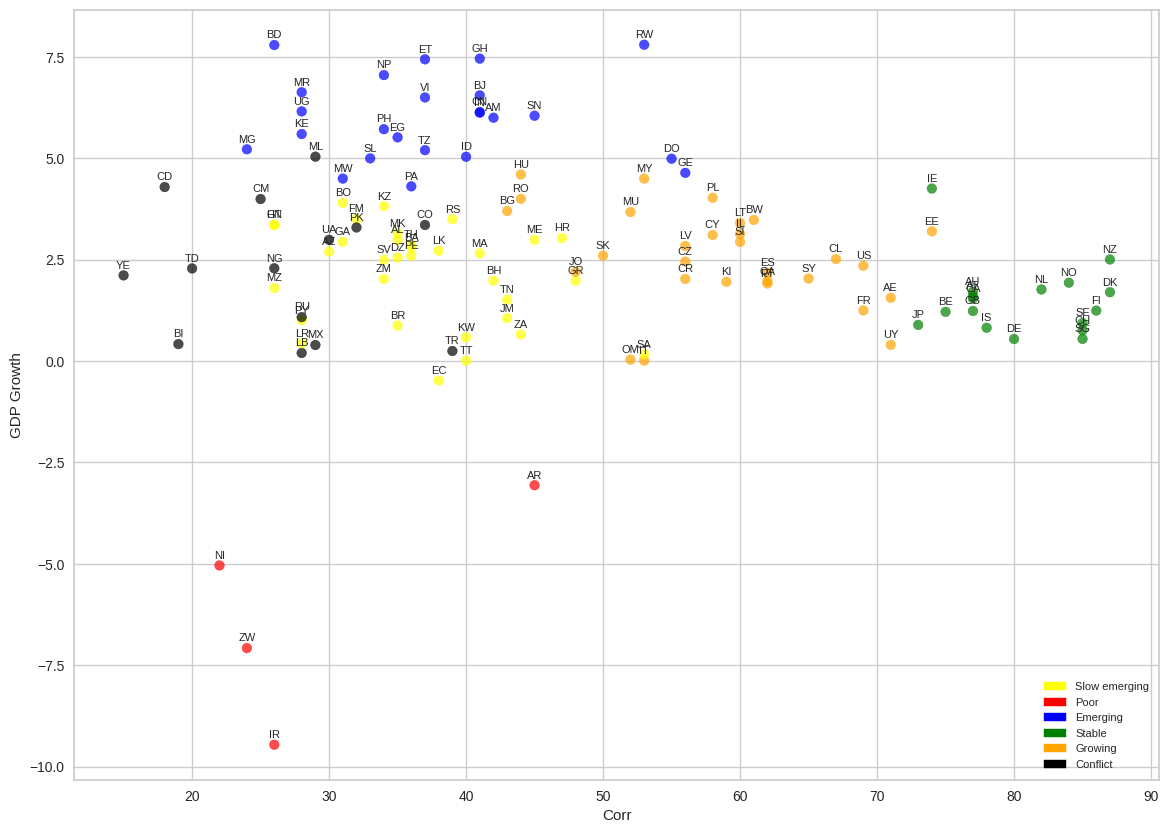

In [146]:
plt.figure(figsize=(14, 10))

colors = df_clustered["Cluster_Name"].map({"Emerging": "blue",
                                           "Poor": "red",
                                           "Stable": "green",
                                           "Conflict": "black",
                                           "Growing": "orange",
                                           "Slow emerging": "yellow"
                                           })

plt.scatter(df_clustered['Corr'], df_clustered['GDP Growth'], c=colors, alpha = 0.7)
plt.xlabel('Corr')
plt.ylabel('GDP Growth')

#scatter point labels
for i in range(len(df_clustered)):
    plt.annotate(f"{df_clustered['Abbrev'][i]}", (df_clustered["Corr"][i], df_clustered["GDP Growth"][i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

#legend
legend_labels = df_clustered["Cluster_Name"].unique()
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors.unique(), legend_labels)]

plt.legend(handles=legend_handles, loc="lower right", fontsize=8)

plt.show()

# PCA

Los componentes sinteticos que se elegiron en clase de este caso:

seguridad institucionalidad

crecimiento economico

In [158]:
pca_x_2 = PCA(n_components=2)
pca_x_2_reduced = pca_x_2.fit_transform(x_features_std)
pca_x_2.explained_variance_ratio_.cumsum() #first 2 compoments explain 89% of the variance of the data

array([0.64020312, 0.89079497])

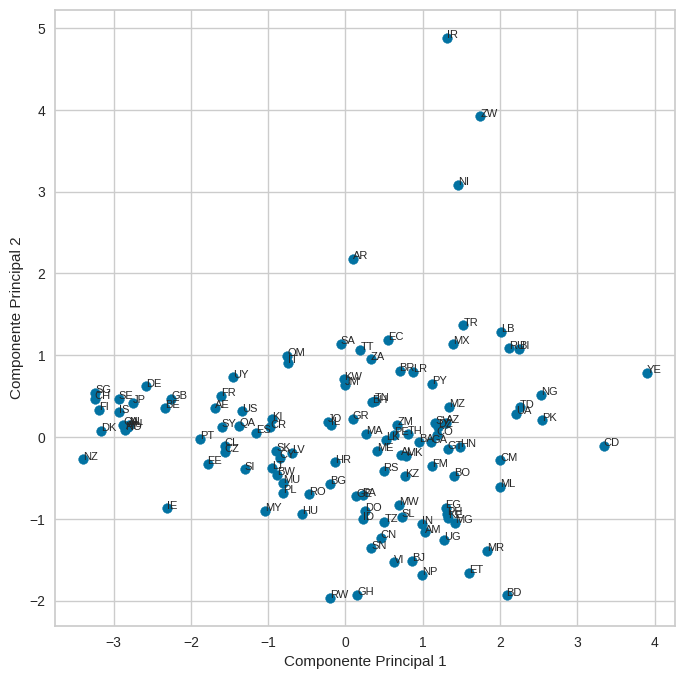

In [153]:
c1 = pca_x_2_reduced[:,0]
c2 = pca_x_2_reduced[:,1]
lab=df['Abbrev']
fig = plt.figure(figsize=(8,8))
plt.scatter(c1,c2)
for i, txt in enumerate(lab):
  plt.annotate(str(txt), (c1[i], c2[i]), fontsize=8)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

Combining both graphs to compare

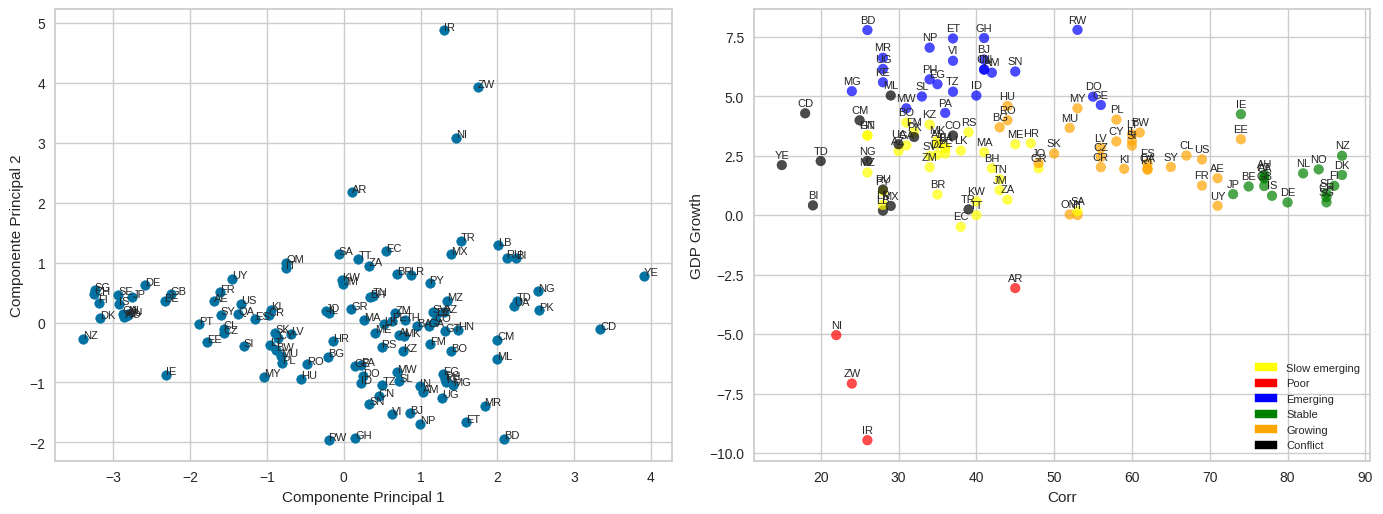

In [175]:
# Plotting the PCA scatter plot
c1 = pca_x_2_reduced[:, 0]
c2 = pca_x_2_reduced[:, 1]
lab = df['Abbrev']

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)  # Subplot for PCA scatter plot
plt.scatter(c1, c2)
for i, txt in enumerate(lab):
    plt.annotate(str(txt), (c1[i], c2[i]), fontsize=8)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Plotting the clustered scatter plot
colors = df_clustered["Cluster_Name"].map({"Emerging": "blue",
                                           "Poor": "red",
                                           "Stable": "green",
                                           "Conflict": "black",
                                           "Growing": "orange",
                                           "Slow emerging": "yellow"
                                           })

plt.subplot(2, 2, 2)  # Subplot for clustered scatter plot
plt.scatter(df_clustered['Corr'], df_clustered['GDP Growth'], c=colors, alpha=0.7)
plt.xlabel('Corr')
plt.ylabel('GDP Growth')

# Scatter point labels
for i in range(len(df_clustered)):
    plt.annotate(f"{df_clustered['Abbrev'][i]}", (df_clustered["Corr"][i], df_clustered["GDP Growth"][i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Legend
legend_labels = df_clustered["Cluster_Name"].unique()
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors.unique(), legend_labels)]

plt.legend(handles=legend_handles, loc="lower right", fontsize=8)

plt.tight_layout()  # Adjust layout for better appearance
plt.show()



Using K-means to cluster the countries based on the PCA components

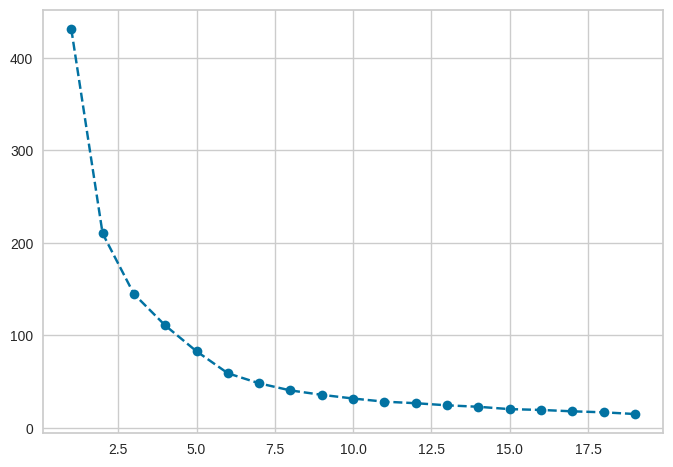

In [186]:
wcss=[]
for i in range(1,20):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(pca_x_2_reduced)
  wcss.append(kmeans_pca.inertia_)

plt.plot(range(1,20), wcss, marker='o', linestyle='--')
plt.show() #still 6 clusters

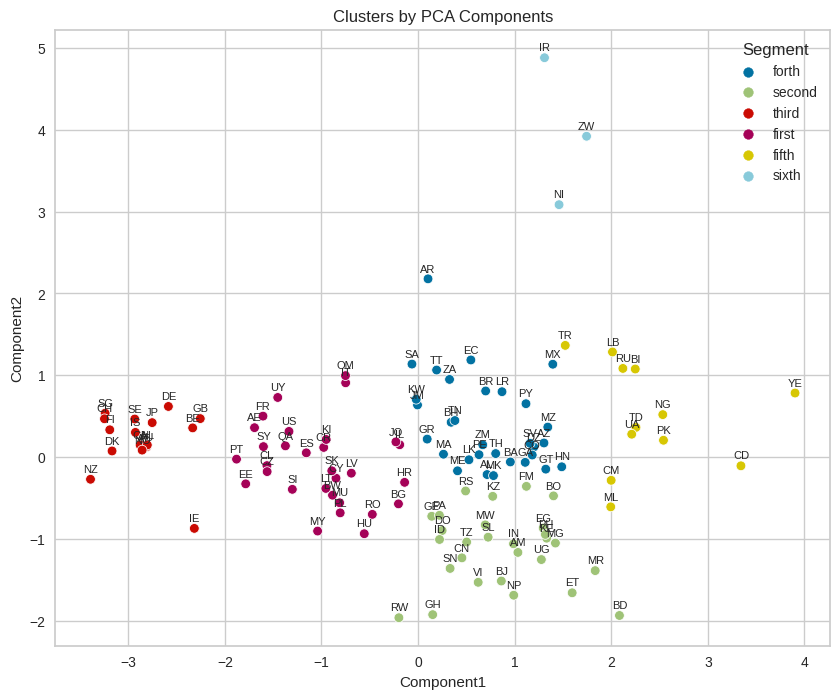

In [184]:
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_pca.fit(pca_x_2_reduced)
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_x_2_reduced)], axis=1)
df_segm_pca_kmeans.columns.values[-2:] = ['Component1', 'Component2']
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({
    0: "first",
    1: "second",
    2: "third",
    3: "forth",
    4: "fifth",
    5: "sixth"
})

# Specify the data parameter for Seaborn scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_segm_pca_kmeans, x='Component1', y='Component2', hue='Segment')
# Scatter point labels
for i in range(len(df_segm_pca_kmeans)):
    plt.annotate(f"{df_segm_pca_kmeans['Abbrev'][i]}", (df_segm_pca_kmeans["Component1"][i], df_segm_pca_kmeans["Component2"][i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
plt.title('Clusters by PCA Components')
plt.show()


# Resumen

Se realizó un 'unsupervised learning' en el conjunto de datos de países, en particular con el modelo de clustering K-means. Este método es adecuado en este caso, ya que no tenemos etiquetas predefinidas. Para determinar un número apropiado de grupos para este conjunto de datos, se utilizó el método del Codo (Elbow method), tanto a través de la built-in función Yellowbrick como manualmente.

Como resultado, el conjunto de datos de países se divide en 6 grupos (clusters) que se definen de la siguiente manera:

Cluster 0 - Corrupción media, alto crecimiento del PIB - Países emergentes (por ejemplo, Armenia, Nepal, Uganda, Vietnam, India)

Cluster 1 - Baja corrupción, buen crecimiento del PIB - Países en crecimiento (por ejemplo, Francia, Italia, España)

Cluster 2 - Corrupción media, bajo crecimiento del PIB - Países de crecimiento lento (por ejemplo, Grecia, Tailandia, Croacia, Marruecos)

Cluster 3 - Alta corrupción, crecimiento negativo del PIB - Países pobres (por ejemplo, Argentina, Irán, Nicaragua, Zimbabue)

Cluster 4 - Alta corrupción, buen crecimiento del PIB - Países en conflicto (por ejemplo, Ucrania, Rusia, Pakistán, Líbano)

Cluster 5 - Corrupción muy baja, crecimiento medio del PIB - Países estables (por ejemplo, Noruega, Reino Unido, Suiza, Japón)

Los resultados coinciden con los resultados que obtuvimos sobre este conjunto de datos en clase, utilizando el método de reducción de dimensiones del Análisis de Componentes Principales (PCA). Transforma las características del conjunto de datos en un número menor de características llamadas componentes principales, tratando de retener tanta información como sea posible y decorrelacionando las características. En este caso, explicamos el 89% de la varianza de los datos. En clase definimos dos parámetros sintéticos: seguridad institucional y crecimiento económico.

También es interesante agrupar los países, pero esta vez basándonos en los componentes PCA reducidos. Tal vez en este caso no tenga un gran efecto en el modelo, porque los features no son tan numerosos, pero PCA podría ser beneficioso como paso previo al modelado para reducir el ruido en los datos.

Después de comparar los resultados de los dos métodos, parece que coinciden bastante bien, ubicando a los países según sus características en un grupo adecuado.